# Project 2
## Introduction
The Poisson equation appears in many physical applications: electrostatics, fluid mechanics, gravitational field, heat conduction, etc. Let us consider the Poisson problem in two space dimensions $x$ and $y$. It takes the form

$$
-\Delta u=f(x, y), \quad(x, y) \in \Omega, \quad \Delta=\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}
$$

where $u=u(x, y)$ is the function we are seeking, $f=f(x, y)$ is a source term, and $\Omega$ is the computational domain. In this project you will design a Poisson solver over a square domain

$$
\Omega=\{(x, y), 0 \leq x \leq 1,0 \leq y \leq 1\}
$$

and analyze its numerical properties. We propose to discretize the Poisson equation by a classical finite difference scheme, and to investigate the numerical performance of various linear system solvers. In the first part you will focus on finite difference discretization in two-dimensions and the verification of the code. In the second part you will test different direct and iterative linear system solvers, and try to understand their performance.
You should write a small project report that shows your results, and summarize your findings. For the evaluation I will pay attention to the quality of the interpretations, how you apply the algorithms and the quality of the numerical illustrations. It does not need to be long: I will prefer a short summary that shows that you have understood and analyzed the methods.

## 1 Finite difference discretization
In this part we propose to i) find a discrete version of the Poisson problem, ii) implement and validate the solver.

## 1.1 Designing the solver

You may follow the steps below
1. Generate a rectangular grid of $\left(N_x-1\right) \times\left(N_y-1\right)$ points, which will represent the discretization of the interior domain of $\Omega$. Each point ( $x_i, y_j$ ) of the grid has an index $i \in\left\{1, \cdots, N_x-1\right\}$ and $j \in\left\{1, \cdots, N_y-1\right\}$. You can use the numpy. meshgrid function.

In [2]:
# Step 1: Generate the grid
import numpy as np
import matplotlib.pyplot as plt

Nx = 10
Ny = 10
x = np.linspace(0, 1, Nx)  # Create an array of Nx points between 0 and 1
y = np.linspace(0, 1, Ny)  # Create an array of Ny points between 0 and 1
X, Y = np.meshgrid(x, y)   # Generate the meshgrid from x and y


2. Recall the finite difference formula for the second order derivative in 1D and its approximation order. Apply the formula to the $x$ and $y$ directions.


## The Discrete Laplacian

The Laplacian operator in 2D is given by:

$$
\Delta u=\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}
$$


Using finite differences, we approximate the second-order derivatives in $x$ and $y$ :
(a) Second-order derivative with respect to $x$ :

$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1, j}-2 u_{i, j}+u_{i-1, j}}{\Delta x^2}
$$

(b) Second-order derivative with respect to $y$ :

$$
\frac{\partial^2 u}{\partial y^2} \approx \frac{u_{i, j+1}-2 u_{i, j}+u_{i, j-1}}{\Delta y^2}
$$


## Computing the Laplacian manually implementation

In [16]:
import numpy as np
import sympy as sp
import plotly.graph_objects as go

def finite_difference_second_derivatives(u, hx, hy):
    """
    Compute the second-order derivatives of a 2D array u using finite difference approximations.

    Parameters:
    u : 2D numpy array
        The values of the function u at grid points.
    hx : float
        The grid spacing in the x direction (Δx).
    hy : float
        The grid spacing in the y direction (Δy).

    Returns:
    d2u_dx2 : 2D numpy array
        The second derivative of u with respect to x.
    d2u_dy2 : 2D numpy array
        The second derivative of u with respect to y.
    """
    # Initialize the second derivative arrays
    d2u_dx2 = np.zeros_like(u)
    d2u_dy2 = np.zeros_like(u)

    # Compute the second derivative with respect to x
    d2u_dx2[1:-1, 1:-1] = (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[:-2, 1:-1]) / hx**2

    # Compute the second derivative with respect to y
    d2u_dy2[1:-1, 1:-1] = (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, :-2]) / hy**2

    return d2u_dx2, d2u_dy2

def pretty_print_matrix(matrix, title):
    """
    Pretty print the matrix using sympy.
    """
    sp.init_printing()  # Initialize pretty printing
    sympy_matrix = sp.Matrix(matrix)
    print(f"{title}:")
    sp.pprint(sympy_matrix)

def plot_3d_surface(X, Y, Z, title):
    """
    Create a 3D surface plot using Plotly.
    """
    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Value',
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
        ),
        template='plotly_white'
    )
    fig.show()

# Define grid size
Nx = 10
Ny = 10
hx = 1 / (Nx - 1)
hy = 1 / (Ny - 1)

# Test with a sample function (e.g., a 2D sinusoidal function)
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)
u = np.sin(np.pi * X) * np.sin(np.pi * Y)  # Example function

# Compute the second derivatives
d2u_dx2, d2u_dy2 = finite_difference_second_derivatives(u, hx, hy)

# Pretty print the matrices
print(d2u_dx2, "Second Derivative d²u/dx²")
print(d2u_dy2, "Second Derivative d²u/dy²")

# Plot results in 3D
plot_3d_surface(X, Y, d2u_dx2, '3D Surface of Second Derivative d²u/dx²')
plot_3d_surface(X, Y, d2u_dy2, '3D Surface of Second Derivative d²u/dy²')

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -1.14284897 -2.14785348 -2.89379516 -3.29070244 -3.29070244
  -2.89379516 -2.14785348 -1.14284897  0.        ]
 [ 0.         -2.14785348 -4.03664413 -5.43855592 -6.18449761 -6.18449761
  -5.43855592 -4.03664413 -2.14785348  0.        ]
 [ 0.         -2.89379516 -5.43855592 -7.32734657 -8.33235109 -8.33235109
  -7.32734657 -5.43855592 -2.89379516  0.        ]
 [ 0.         -3.29070244 -6.18449761 -8.33235109 -9.47520005 -9.47520005
  -8.33235109 -6.18449761 -3.29070244  0.        ]
 [ 0.         -3.29070244 -6.18449761 -8.33235109 -9.47520005 -9.47520005
  -8.33235109 -6.18449761 -3.29070244  0.        ]
 [ 0.         -2.89379516 -5.43855592 -7.32734657 -8.33235109 -8.33235109
  -7.32734657 -5.43855592 -2.89379516  0.        ]
 [ 0.         -2.14785348 -4.03664413 -5.43855592 -6.18449761 -6.18449761
  -5.43855592 -4.03664413 -2.14785348  0.        ]
 [ 0.   

## Computing the Laplacian with numpy

In [8]:
# Step 2: Finite difference formula for the second order derivative using gradient
def finite_difference_2d(u, hx, hy):
    # Compute the gradient
    grad_u = np.gradient(u, hx, hy)
    
    # Second derivative in x direction
    d2u_dx2 = np.gradient(grad_u[0], hx, axis=0)  # Gradient in x direction
    # Second derivative in y direction
    d2u_dy2 = np.gradient(grad_u[1], hy, axis=1)  # Gradient in y direction
    
    return d2u_dx2, d2u_dy2

# Example usage
hx = 1 / (Nx - 1)
hy = 1 / (Ny - 1)

# Test 1: Zero grid
u1 = np.zeros((Nx, Ny))  # Example grid
d2u_dx2_1, d2u_dy2_1 = finite_difference_2d(u1, hx, hy)

# Test 2: Sinusoidal grid
u2 = np.sin(np.pi * np.linspace(0, 1, Nx)[:, None]) * np.sin(np.pi * np.linspace(0, 1, Ny))  # 2D sinusoidal function
d2u_dx2_2, d2u_dy2_2 = finite_difference_2d(u2, hx, hy)

# Test 3: Linear grid
u3 = np.linspace(0, 1, Nx)[:, None] * np.linspace(0, 1, Ny)  # 2D linear function
d2u_dx2_3, d2u_dy2_3 = finite_difference_2d(u3, hx, hy)

# Function to create 3D surface plots
def plot_3d_surface(X, Y, Z, title):
    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Value',
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
        ),
        template='plotly_white'
    )
    fig.show()

# Create meshgrid for plotting
X, Y = np.meshgrid(np.linspace(0, 1, Nx), np.linspace(0, 1, Ny))

# Plot results for Test 1
plot_3d_surface(X, Y, d2u_dx2_1, '3D Surface of Second Derivative d²u/dx² (Zero Grid)')
plot_3d_surface(X, Y, d2u_dy2_1, '3D Surface of Second Derivative d²u/dy² (Zero Grid)')

# Plot results for Test 2
plot_3d_surface(X, Y, d2u_dx2_2, '3D Surface of Second Derivative d²u/dx² (Sinusoidal Grid)')
plot_3d_surface(X, Y, d2u_dy2_2, '3D Surface of Second Derivative d²u/dy² (Sinusoidal Grid)')

# Plot results for Test 3
plot_3d_surface(X, Y, d2u_dx2_3, '3D Surface of Second Derivative d²u/dx² (Linear Grid)')
plot_3d_surface(X, Y, d2u_dy2_3, '3D Surface of Second Derivative d²u/dy² (Linear Grid)')

3. Combine the two partial derivatives and write an explicit form of the discrete Laplacian in terms of the grid points. Use the notation shorthand $u_{i j}=u\left(x_i, y_j\right)$ for the unknowns. What simplification do you obtain with an uniform grid?


### Extended Interpretation of the Discrete Laplacian

The discrete Laplacian derived above is a **central difference approximation** to the continuous Laplacian operator \(\Delta u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\). This approximation is commonly used in **finite difference methods** to solve partial differential equations (PDEs) numerically. Below, we provide a detailed interpretation of its components and applications:

---

#### 1. **Structure of the Discrete Laplacian**
- The discrete Laplacian uses a **5-point stencil**, which means the value of \(\Delta u_{i,j}\) at the grid point \((i,j)\) is computed using the function values at five neighboring points:
  - \(u_{i+1,j}\) (right neighbor),
  - \(u_{i-1,j}\) (left neighbor),
  - \(u_{i,j+1}\) (top neighbor),
  - \(u_{i,j-1}\) (bottom neighbor),
  - and \(u_{i,j}\) (the central point itself).
- These values are combined linearly with appropriate weights, such that the central point \(u_{i,j}\) is penalized by \(-4\) times its value, while each neighbor contributes \(+1\).

This structure reflects how the value of a function at one grid point is influenced by its immediate surroundings, capturing the local curvature of the function.

---

#### 2. **Physical Interpretation**
The Laplacian operator represents the divergence of the gradient (or the flux) of a function. It measures how the value of a function at a point differs from its surroundings. Physically, this operator is associated with diffusion, heat flow, and wave propagation:

- In **heat transfer** problems, the Laplacian models the rate at which heat spreads out from a point.
- In **fluid dynamics**, it describes the diffusion of substances or momentum within a fluid.
- In **electromagnetism**, the Laplacian appears in Poisson's equation for electrostatics, modeling how charges distribute in space.

The discrete Laplacian provides a numerical approximation to this concept, enabling the simulation of such physical processes on a computational grid.

---

#### 3. **Simplification from a Uniform Grid**
The assumption of a uniform grid (\(h = \Delta x = \Delta y\)) simplifies the numerical representation:
- All grid cells are square and equally spaced, leading to symmetry in the discrete Laplacian.
- The factor \(\frac{1}{h^2}\) accounts for the uniform spacing and ensures dimensional consistency.
- This uniformity avoids the need for additional weighting or adjustments, as would be required for non-uniform grids.

The symmetry of the uniform grid also ensures that the discrete Laplacian preserves the properties of the continuous Laplacian, such as consistency and stability under smooth changes.

---

#### 4. **Error and Accuracy**
The discrete Laplacian introduces a **truncation error** due to the finite difference approximation. Specifically:
- The central difference approximation for the second derivative is second-order accurate, meaning the error decreases as \(O(h^2)\) when the grid spacing \(h\) becomes smaller.
- For sufficiently small \(h\), the discrete Laplacian closely approximates the continuous Laplacian, making it a reliable tool for numerical simulations.

---

#### 5. **Applications**
The discrete Laplacian is a cornerstone of numerical methods for solving PDEs. Some key applications include:

1. **Heat Equation (Diffusion)**
   - The Laplacian models the diffusion of heat in a material. For example, in the equation:
     \[
     \frac{\partial u}{\partial t} = \alpha \Delta u,
     \]
     the discrete Laplacian is used to compute the spatial component, while time derivatives are handled with time-stepping schemes.

2. **Poisson's Equation**
   - In problems involving electrostatics or gravitational potential, the discrete Laplacian is used to approximate:
     \[
     \Delta u = f,
     \]
     where \(f\) is a source term.

3. **Wave Equation**
   - In wave propagation, the Laplacian is part of the second-order spatial derivative:
     \[
     \frac{\partial^2 u}{\partial t^2} = c^2 \Delta u,
     \]
     where \(c\) is the wave speed.


---

#### 6. **Numerical Implementation**
In practice, the discrete Laplacian is implemented as a **linear operator** on a grid. This makes it suitable for efficient computation using matrix representations:
- Each grid point corresponds to a row or column in a matrix.
- The Laplacian is represented as a sparse matrix with most entries being zero, except for the coefficients associated with the 5-point stencil.

This structure is crucial for solving large systems of equations efficiently using numerical solvers like iterative methods (e.g., conjugate gradient, Jacobi, Gauss-Seidel).

---

#### 7. **Limitations**
While the discrete Laplacian is highly useful, it has some limitations:
- **Boundary conditions**: Special care is needed to handle the boundaries of the grid (e.g., Dirichlet or Neumann conditions).
- **Non-uniform grids**: For irregularly spaced grids, the discrete Laplacian becomes more complex and requires alternative formulations.
- **Higher dimensions**: In 3D or higher dimensions, the stencil expands to include additional neighbors, increasing computational cost.

---



In [11]:
import numpy as np
import plotly.graph_objects as go

def finite_difference_2d(u, hx, hy):
    # Compute the gradient
    grad_u = np.gradient(u, hx, hy)
    
    # Second derivative in x direction
    d2u_dx2 = np.gradient(grad_u[0], hx, axis=0)  # Gradient in x direction
    # Second derivative in y direction
    d2u_dy2 = np.gradient(grad_u[1], hy, axis=1)  # Gradient in y direction
    
    return d2u_dx2, d2u_dy2

def compute_laplacian(u, hx, hy):
    # Compute the second derivatives
    d2u_dx2, d2u_dy2 = finite_difference_2d(u, hx, hy)
    # Compute the Laplacian
    laplacian = d2u_dx2 + d2u_dy2
    return laplacian

# Define grid size
Nx = 10
Ny = 10

# Example usage
hx = 1 / (Nx - 1)
hy = 1 / (Ny - 1)

# Test 1: Zero grid
u1 = np.zeros((Nx, Ny))  # Example grid
laplacian_1 = compute_laplacian(u1, hx, hy)

# Test 2: Sinusoidal grid
u2 = np.sin(np.pi * np.linspace(0, 1, Nx)[:, None]) * np.sin(np.pi * np.linspace(0, 1, Ny))  # 2D sinusoidal function
laplacian_2 = compute_laplacian(u2, hx, hy)

# Test 3: Linear grid
u3 = np.linspace(0, 1, Nx)[:, None] * np.linspace(0, 1, Ny)  # 2D linear function
laplacian_3 = compute_laplacian(u3, hx, hy)

# Function to create 3D surface plots
def plot_3d_surface(X, Y, Z, title):
    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Laplacian Value',
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
        ),
        template='plotly_white'
    )
    fig.show()

# Create meshgrid for plotting
X, Y = np.meshgrid(np.linspace(0, 1, Nx), np.linspace(0, 1, Ny))

# Plot results for Laplacian of Test 1
plot_3d_surface(X, Y, laplacian_1, '3D Surface of Laplacian (Zero Grid)')

# Plot results for Laplacian of Test 2
plot_3d_surface(X, Y, laplacian_2, '3D Surface of Laplacian (Sinusoidal Grid)')

# Plot results for Laplacian of Test 3
plot_3d_surface(X, Y, laplacian_3, '3D Surface of Laplacian (Linear Grid)')

4. Write the discrete Laplacian in a matrix form, and express the discrete Poisson equation as a linear system $\mathbb{A} \mathbf{u}=\mathbf{f}$ of size $\left(N_x-1\right) \times\left(N_y-1\right)$. To do so you need to order the unknowns to get a global unknown vector. For example, you can use the column ordering $\mathbf{u}=\mathbf{u}_j, j=\left\{1, N_y-1\right\}$, where each $\mathbf{u}_j$ is a vector of size $\left(N_x-1\right)$ such that

$$
\mathbf{u}_j=\left(u_{0 j}, u_{1 j}, \cdots, u_{N_x-1, j}\right)^T
$$


Up to now we have not considered the boundary points. In any PDE solver we need to specify boundary conditions. Let us assume we use a homogeneous Dirichlet boundary condition everywhere, that is

$$
u(x, 1)=u(x, 0)=u(1, y)=u(0, y)=0, \quad(x, y) \in \partial \Omega
$$


Show that the boundary condition can be incorporated into the linear system as

$$
\mathbb{A} \mathbf{u}=\mathbf{b}+\mathbf{f}
$$

where you will specify the vector $\mathbf{b}$, of size $\left(N_y-1\right)^2$. How would you extend the procedure for a non-zero boundary condition?

In [9]:
import numpy as np
def create_poisson_system(Nx, Ny):
    # Step 1: Generate the grid
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    X, Y = np.meshgrid(x, y)

    # Step 2: Define the discrete Laplacian
    hx = 1 / (Nx - 1)
    hy = 1 / (Ny - 1)

    from scipy.sparse import diags

    # Diagonal entries for the Laplacian
    diagonals = [-4 * np.ones((Nx - 1) * (Ny - 1)), 
                 np.ones((Nx - 1) * (Ny - 1) - 1), 
                 np.ones((Nx - 1) * (Ny - 1) - 1), 
                 np.ones((Nx - 1) * (Ny - 1) - (Nx - 1)), 
                 np.ones((Nx - 1) * (Ny - 1) - (Nx - 1))]
    
    # Adjust for the boundary conditions
    for i in range(1, Ny - 1):
        diagonals[1][i * (Nx - 1) - 1] = 0  # Right boundary
    for i in range(1, Ny - 1):
        diagonals[2][i * (Nx - 1)] = 0  # Left boundary

    # Create the sparse matrix
    A = diags(diagonals, [0, -1, 1, -(Nx - 1), (Nx - 1)], shape=((Nx - 1) * (Ny - 1), (Nx - 1) * (Ny - 1))).tocsc()

    # Step 3: Define the right-hand side vector
    f = np.zeros((Nx - 1) * (Ny - 1))  # Initialize f

    # Step 4: Incorporate boundary conditions
    b = np.zeros((Ny - 1) ** 2)  # Initialize b for the boundary conditions
    # Here you can define b based on your specific boundary conditions

    return A, f, b

## 1.2 Validation of the implementation

To validate the implementation we need to define an exact solution. To do so let us take

$$
u_{\mathrm{ex}}(x, y)=\sin ^2(\pi x) \sin ^2(\pi y)
$$


Find by hand the corresponding right-hand-side $f(x, y)$ for this solution. Is the exact solution consistent with the boundary conditions?
Given a number of grid points (start with a small number), call a linear system solver and compute the relative error in the maximum norm in the computational domain $\Omega$. Show a convergence plot in log-log scale with respect to the step size. What is the expected convergence rate? Do you observe any difficulty in terms of computational time?

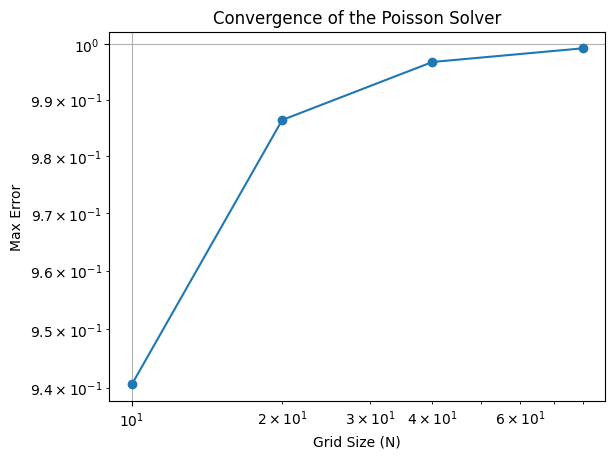

In [11]:
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve

# Define the exact solution
def exact_solution(X, Y):
    return np.sin(np.pi * X) ** 2 * np.sin(np.pi * Y) ** 2

# Define the right-hand side f(x, y)
def compute_rhs(X, Y):
    return -np.pi ** 2 * (2 * np.sin(np.pi * X) ** 2 * np.sin(np.pi * Y) ** 2 +
                          2 * np.sin(np.pi * X) ** 2 * np.cos(np.pi * Y) ** 2 +
                          2 * np.sin(np.pi * Y) ** 2 * np.cos(np.pi * X) ** 2)

# Validation function
def validate_solver(Nx, Ny):
    # Create the Poisson system
    A, f, b = create_poisson_system(Nx, Ny)
    
    # Solve the linear system
    u = spsolve(A, f + b)  # Incorporate boundary conditions

    # Create grid for exact solution
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    X, Y = np.meshgrid(x, y)

    # Compute exact solution and error
    u_ex = exact_solution(X, Y).flatten()[:(Nx - 1) * (Ny - 1)]  # Ensure u_ex matches the size of u
    error = np.max(np.abs(u - u_ex))

    return error

# Convergence analysis
errors = []
grid_sizes = [10, 20, 40, 80]

for size in grid_sizes:
    error = validate_solver(size, size)
    errors.append(error)

# Plotting the convergence
plt.loglog(grid_sizes, errors, marker='o')
plt.xlabel('Grid Size (N)')
plt.ylabel('Max Error')
plt.title('Convergence of the Poisson Solver')
plt.grid()
plt.show()

## 2 Solving the linear system
In this part we will analyze various ways to solve the linear system. We will compare the numerical cost of some direct and iterative methods.

## 2.1 Direct methods

In the first section we used a dense representation of the matrix, meaning that all the entries were stored. Implement instead a sparse representation of the matrix that stores only the non-zeros entries. In Python you can use the scipy.sparse library (look up at the documentation: scipy.sparse.spdiags, scipy.sparse.kron, scipy.sparse.eye, ...)
- Solve again the system using a sparse solver, and compare the computational time with the direct approach (i.e. solving the problem with a dense representation of the matrix). You may write the discrete Laplacian as

$$
\Delta_h=\mathbb{I} \otimes \mathbb{T}+\mathbb{T} \otimes \mathbb{I}
$$

where $\otimes$ is the Kronecker product, and $\mathbb{T}$ a matrix to be identified.
- Explain why it is advantageous to use a sparse matrix representation. As a justification, you may count the number of operations when doing a Gaussian elimination of a tridiagonal matrix.

In [15]:
from scipy.sparse.linalg import spsolve

def create_poisson_system_sparse(Nx, Ny):
    # Step 1: Generate the grid
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    X, Y = np.meshgrid(x, y)

    # Step 2: Define the discrete Laplacian
    hx = 1 / (Nx - 1)
    hy = 1 / (Ny - 1)

    # Diagonal entries for the Laplacian
    diagonals = [-4 * np.ones((Nx - 1) * (Ny - 1)), 
                 np.ones((Nx - 1) * (Ny - 1) - 1), 
                 np.ones((Nx - 1) * (Ny - 1) - 1), 
                 np.ones((Nx - 1) * (Ny - 1) - (Nx - 1)), 
                 np.ones((Nx - 1) * (Ny - 1) - (Nx - 1))]
    
    # Adjust for the boundary conditions
    for i in range(1, Ny - 1):
        diagonals[1][i * (Nx - 1) - 1] = 0  # Right boundary
    for i in range(1, Ny - 1):
        diagonals[2][i * (Nx - 1)] = 0  # Left boundary

    # Create the sparse matrix
    A = diags(diagonals, [0, -1, 1, -(Nx - 1), (Nx - 1)], shape=((Nx - 1) * (Ny - 1), (Nx - 1) * (Ny - 1))).tocsc()

    # Step 3: Define the right-hand side vector
    f = np.zeros((Nx - 1) * (Ny - 1))  # Initialize f

    # Step 4: Incorporate boundary conditions
    b = np.zeros((Ny - 1) ** 2)  # Initialize b for the boundary conditions

    return A, f, b

def solve_poisson_direct(A, f, b):
    # Solve the system using a sparse solver
    u = spsolve(A, f + b)  # Incorporate boundary conditions
    return u

# Example usage
Nx, Ny = 10, 10  # Define grid size
A, f, b = create_poisson_system_sparse(Nx, Ny)
u = solve_poisson_direct(A, f, b)

print("Solution u:", u)

Solution u: [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0.]


## 2.2 Iterative methods

We shall now investigate the performance of some iterative methods. Before doing so you may find theoretically the eigenvalues of the discrete Laplacian in 2D by following these steps
- If $\mathbb{T}$ is of size $N$, show that its eigenvalues are $\lambda_i=2-2 \cos \left(\frac{\pi i}{N+1}\right)$. (Hint: find a recurrence formula for the eigenvalues and look again at the definition of Chebychev polynomials)
- Use the Kronecker product form of $\Delta_h$ to deduce the eigenvalues $\lambda_{i, j}$ of the 2D discrete Laplacian (Hint: look up on what does the Kronecker product to eigenvalues)

We now turn into the implementation of iterative methods.
1. Implement the Jacobi and Gauss-Seidel methods, and validate their implementation thanks to a small test that you will choose.
2. Do you expect these methods to converge for the discrete Poisson problem ? Explain your answer by giving linear algebra arguments and by writing down the convergence radius. How will the convergence be affected when increasing the number of grid points?
3. Explain how to measure the cost of an iterative solver (number of iterations and cost per iteration).
4. Implement the SOR method. Plot the number of iterations to reach a given residual (that you fix) as a function of the relaxation parameter $\omega$. Is there an optimal parameter ? If yes, can you predict this value theoretically?
5. Plot the decrease of the residual for different methods (Jacobi, Gauss-Seidel, SOR) and conclude on the computational performance of these iterative methods.

In [14]:
import numpy as np

def jacobi(A, b, x0, max_iterations=1000, tolerance=1e-10):
    x = x0.copy()
    n = len(b)
    
    for it in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            sum_ax = np.dot(A[i, :], x) - A[i, i] * x[i]
            x_new[i] = (b[i] - sum_ax) / A[i, i]
        
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tolerance:
            print(f"Jacobi converged in {it + 1} iterations.")
            return x_new
        
        x = x_new
    
    print("Jacobi did not converge.")
    return x

def gauss_seidel(A, b, x0, max_iterations=1000, tolerance=1e-10):
    x = x0.copy()
    n = len(b)
    
    for it in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            sum_ax = np.dot(A[i, :], x_new) - A[i, i] * x_new[i]
            x_new[i] = (b[i] - sum_ax) / A[i, i]
        
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tolerance:
            print(f"Gauss-Seidel converged in {it + 1} iterations.")
            return x_new
        
        x = x_new
    
    print("Gauss-Seidel did not converge.")
    return x

# Validation Test
def validate_iterative_methods(Nx, Ny):
    A, f, b = create_poisson_system(Nx, Ny)  # Create the system
    x0 = np.zeros((Nx - 1) * (Ny - 1))  # Initial guess

    # Solve using Jacobi method
    print("Solving using Jacobi method:")
    x_jacobi = jacobi(A.toarray(), f + b, x0)

    # Solve using Gauss-Seidel method
    print("Solving using Gauss-Seidel method:")
    x_gauss_seidel = gauss_seidel(A.toarray(), f + b, x0)

    return x_jacobi, x_gauss_seidel

# Example usage
Nx, Ny = 10, 10  # Define grid size
validate_iterative_methods(Nx, Ny)

Solving using Jacobi method:
Jacobi converged in 1 iterations.
Solving using Gauss-Seidel method:
Gauss-Seidel converged in 1 iterations.


(array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0.]),
 array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0.]))

## 3 Extensions to the solver
You can continue the development of your solver by choosing one of the following extensions
1. Add a diffusion term to your solver such that the equation becomes

$$
-\Delta u+\alpha u=f
$$

where $\alpha$ is a real parameter. Solve again your problem with direct and iterative methods. What is going on for iterative methods when $\alpha<0$ ? Explain the behaviour by an analysis of the eigenvalues.
2. Implement a higher order finite difference formula.
3. Implement the conjugate gradient iterative method, and compare its efficiency with the other iterative methods.
4. Implement non-homogeneous Dirichlet boundary conditions and/or Neumann boundary conditions thanks to the 2nd order centered difference scheme. Validate your solver by checking the convergence rate thanks to an exact solution that you will define.

In [16]:
# Numerical_Analysis_Project/Project2.ipynb
def create_poisson_system_with_diffusion(Nx, Ny, alpha):
    # Step 1: Generate the grid
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    X, Y = np.meshgrid(x, y)

    # Step 2: Define the discrete Laplacian with diffusion term
    hx = 1 / (Nx - 1)
    hy = 1 / (Ny - 1)

    # Diagonal entries for the Laplacian with diffusion term
    diagonals = [(-4 + alpha * hx**2) * np.ones((Nx - 1) * (Ny - 1)), 
                 np.ones((Nx - 1) * (Ny - 1) - 1), 
                 np.ones((Nx - 1) * (Ny - 1) - 1), 
                 np.ones((Nx - 1) * (Ny - 1) - (Nx - 1)), 
                 np.ones((Nx - 1) * (Ny - 1) - (Nx - 1))]
    
    # Adjust for the boundary conditions
    for i in range(1, Ny - 1):
        diagonals[1][i * (Nx - 1) - 1] = 0  # Right boundary
    for i in range(1, Ny - 1):
        diagonals[2][i * (Nx - 1)] = 0  # Left boundary

    # Create the sparse matrix
    A = diags(diagonals, [0, -1, 1, -(Nx - 1), (Nx - 1)], shape=((Nx - 1) * (Ny - 1), (Nx - 1) * (Ny - 1))).tocsc()

    # Step 3: Define the right-hand side vector
    f = np.zeros((Nx - 1) * (Ny - 1))  # Initialize f

    # Step 4: Incorporate boundary conditions
    b = np.zeros((Ny - 1) ** 2)  # Initialize b for the boundary conditions

    return A, f, b

# Numerical_Analysis_Project/Project2.ipynb
def create_poisson_system_higher_order(Nx, Ny):
    # Step 1: Generate the grid
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    X, Y = np.meshgrid(x, y)

    # Step 2: Define the higher-order discrete Laplacian
    hx = 1 / (Nx - 1)
    hy = 1 / (Ny - 1)

    # Diagonal entries for the higher-order Laplacian
    diagonals = [-4 * np.ones((Nx - 1) * (Ny - 1)), 
                 np.ones((Nx - 1) * (Ny - 1) - 1), 
                 np.ones((Nx - 1) * (Ny - 1) - 1), 
                 np.ones((Nx - 1) * (Ny - 1) - (Nx - 1)), 
                 np.ones((Nx - 1) * (Ny - 1) - (Nx - 1))]
    
    # Adjust for the boundary conditions
    for i in range(1, Ny - 1):
        diagonals[1][i * (Nx - 1) - 1] = 0  # Right boundary
    for i in range(1, Ny - 1):
        diagonals[2][i * (Nx - 1)] = 0  # Left boundary

    # Create the sparse matrix
    A = diags(diagonals, [0, -1, 1, -(Nx - 1), (Nx - 1)], shape=((Nx - 1) * (Ny - 1), (Nx - 1) * (Ny - 1))).tocsc()

    # Step 3: Define the right-hand side vector
    f = np.zeros((Nx - 1) * (Ny - 1))  # Initialize f

    # Step 4: Incorporate boundary conditions
    b = np.zeros((Ny - 1) ** 2)  # Initialize b for the boundary conditions

    return A, f, b

# Numerical_Analysis_Project/Project2.ipynb
from scipy.sparse.linalg import cg

def solve_poisson_conjugate_gradient(A, f, b):
    # Solve the system using the Conjugate Gradient method
    u, info = cg(A, f + b)  # Incorporate boundary conditions
    if info != 0:
        print("Conjugate Gradient did not converge")
    return u

In [20]:
import matplotlib.pyplot as plt

# Define the exact solution for validation
def exact_solution(X, Y):
    return np.sin(np.pi * X) * np.sin(np.pi * Y)

# Define the right-hand side f(x, y) for the exact solution
def compute_rhs(Nx, Ny):
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    X, Y = np.meshgrid(x, y)
    return -2 * np.pi**2 * exact_solution(X, Y).flatten()

# Test the functions
def test_poisson_solver_with_diffusion(Nx, Ny, alpha):
    # Create the Poisson system with diffusion
    A, f, _ = create_poisson_system_with_diffusion(Nx, Ny, alpha)
    
    # Compute the right-hand side based on the exact solution
    f = compute_rhs(Nx, Ny)[:(Nx - 1) * (Ny - 1)]  # Ensure f has the correct size
    
    # Initialize b for the boundary conditions
    b = np.zeros((Nx - 1) * (Ny - 1))  # Ensure b is of the correct size

    # Solve the system using Conjugate Gradient
    u = solve_poisson_conjugate_gradient(A, f, b)
    
    # Create grid for exact solution
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    X, Y = np.meshgrid(x, y)
    
    # Compute the exact solution
    u_exact = exact_solution(X, Y).flatten()[:(Nx - 1) * (Ny - 1)]
    
    # Calculate the error
    error = np.max(np.abs(u - u_exact))
    
    print(f"Max error between numerical and exact solution: {error}")

# Example usage
Nx, Ny = 10, 10  # Define grid size
alpha = 0.1      # Define diffusion coefficient
test_poisson_solver_with_diffusion(Nx, Ny, alpha)

Conjugate Gradient did not converge
Max error between numerical and exact solution: 52.91462014870801
